## Black-Scholes Model
https://github.com/hardikroutray/QuantitativeFinance/blob/main/BlackScholesModel.ipynb

We eliminate systematic(market) risk by combining positively and negatively correlated assets, for e.g. a long position in an option and a short position in the underlying stock

### $\Pi$ = V(S,t) - $\Delta$S

where

### V(S,t) = option price, S = underlying stock

### $dV(S,t) = \frac{\partial V}{\partial t}dt + \frac{\partial V}{\partial S}dS + \frac{1}{2}\sigma^{2}S^{2}\frac{\partial^{2} V}{\partial S^{2}} dt$ 
### $d\Pi = dV(S,t) - \Delta dS$
### => $d\Pi = (\frac{\partial V}{\partial t} + \frac{1}{2}\sigma^{2}S^{2}\frac{\partial^{2} V}{\partial S^{2}}) dt + (\frac{\partial V}{\partial S} - \Delta)dS$ 

### Risk is reduced to zero if $\Delta = \frac{\partial V}{\partial S}$ i.e delta hedging

Using no arbitrage principle, 

### $d\Pi = r \Pi dt$ 

where r is the risk free rate

### $\bf \frac{\partial V}{\partial t} + \frac{1}{2}\sigma^{2}S^{2}\frac{\partial^{2} V}{\partial S^{2}} + r S \frac{\partial V}{\partial S} - r V = 0$ 

### $\bf \Theta + \frac{1}{2}\sigma^{2}S^{2}\Gamma + r S \Delta - r V = 0$

In [7]:
from scipy import stats
import numpy as np
from numpy import log, exp, sqrt
import matplotlib.pyplot as plt

## Exact Solution 

![image](./SolutionBS.jpeg)


In [2]:
def call_option_price(S, E, T, rf, sigma):
    # first we have to calculate d1 and d2 parameters
    d1 = (log(S / E) + (rf + sigma * sigma / 2.0) * T) / (sigma * sqrt(T))
    d2 = d1 - sigma * sqrt(T)
    print("The d1 and d2 parameters: %s, %s" % (d1, d2))
    # use the N(x) to calculate the price of the option
    return S*stats.norm.cdf(d1)-E*exp(-rf*T)*stats.norm.cdf(d2)


def put_option_price(S, E, T, rf, sigma):
    # first we have to calculate d1 and d2 parameters
    d1 = (log(S / E) + (rf + sigma * sigma / 2.0) * T) / (sigma * sqrt(T))
    d2 = d1 - sigma * sqrt(T)
    print("The d1 and d2 parameters: %s, %s" % (d1, d2))
    # use the N(x) to calculate the price of the option
    return -S*stats.norm.cdf(-d1)+E*exp(-rf*T)*stats.norm.cdf(-d2)

In [3]:
# underlying stock price at t=0
S0 = 100
# strike price
E = 100
# expiry 1year=365days
T = 1
# risk-free rate
rf = 0.05
# volatility of the underlying stock
sigma = 0.2

print("Call option price according to Black-Scholes model: ", call_option_price(S0, E, T, rf, sigma))
print("Put option price according to Black-Scholes model: ", put_option_price(S0, E, T, rf, sigma))

The d1 and d2 parameters: 0.35000000000000003, 0.15000000000000002
Call option price according to Black-Scholes model:  10.450583572185565
The d1 and d2 parameters: 0.35000000000000003, 0.15000000000000002
Put option price according to Black-Scholes model:  5.573526022256971


## Solution from Monte Carlo simulation

In [16]:
class OptionPricing:
    
    def __init__(self,S0,E,T,rf,sigma,iterations):
        self.S0 = S0
        self.E = E
        self.T = T
        self.rf = rf
        self.sigma = sigma     
        self.iterations = iterations 


    def call_option_simulation(self):

        #we have 2 columns: first with 0s the second column will store the payoff
        #we need the first column of 0s: payoff function is max(0,S-E) for call option
        option_data = np.zeros([self.iterations, 2])

        #dimensions: 1 dimensional array with as many items as the itrations
        rand = np.random.normal(0, 1, [1, self.iterations])

        #equation for the S(t) stock price
        stock_price = self.S0*np.exp(self.T*(self.rf - 0.5*self.sigma**2)+self.sigma*np.sqrt(self.T)*rand)

        #we need S-E because we have to calculate the max(S-E,0)
        option_data[:,1] = stock_price - self.E   

        fig = plt.figure(figsize=(10,5))
        plt.hist(np.amax(option_data, axis=1),bins=100)
        plt.yscale('log')
        plt.xlim(-1,100)
        plt.show()
        
        #average for the Monte-Carlo method
        #np.amax() returns the max(0,S-E) according to the formula
        average = np.sum(np.amax(option_data, axis=1))/float(self.iterations)

        #have to use the exp(-rT) discount factor
        return np.exp(-1.0*self.rf*self.T)*average


    def put_option_simulation(self):

        #we have 2 columns: first with 0s the second column will store the payoff
        #we need the first column of 0s: payoff function is max(0,E-S) for put option
        option_data = np.zeros([self.iterations, 2])

        #dimensions: 1 dimensional array with as many items as the itrations
        rand = np.random.normal(0, 1, [1, self.iterations])

        #equation for the S(t) stock price
        stock_price = self.S0*np.exp(self.T*(self.rf - 0.5*self.sigma**2)+self.sigma*np.sqrt(self.T)*rand)
        
        #we need E-S because we have to calculate the max(E-S,0)
        option_data[:,1] = self.E - stock_price  

        fig = plt.figure(figsize=(10,5))
        plt.hist(np.amax(option_data, axis=1),bins=100)
        plt.yscale('log')
        plt.xlim(-1,100)
        plt.show()
        
        #average for the Monte-Carlo method
        #np.amax() returns the max(0,E-S) according to the formula
        average = np.sum(np.amax(option_data, axis=1))/float(self.iterations)

        #have to use the exp(-rT) discount factor
        return np.exp(-1.0*self.rf*self.T)*average

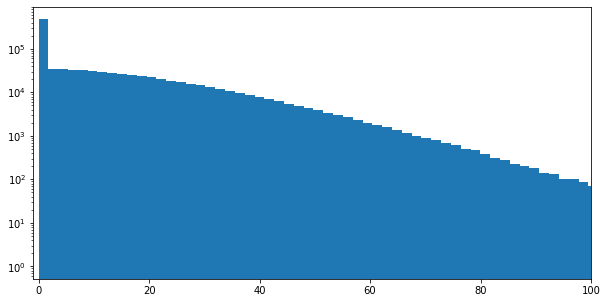

Call option price with Monte-Carlo approach:  10.457926286664971


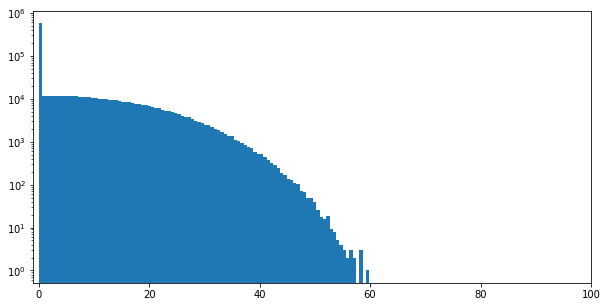

Put option price with Monte-Carlo approach:  5.56254027778285


In [17]:
S0=100 #underlying stock price at t=0
E=100 #strike price
T = 1 #expiry
rf = 0.05 #risk-free rate
sigma=0.2 #volatility of the underlying stock
iterations = 1000000 #number of iterations in the Monte-Carlo simulation	

model = OptionPricing(S0,E,T,rf,sigma,iterations)
print("Call option price with Monte-Carlo approach: ", model.call_option_simulation()) 
print("Put option price with Monte-Carlo approach: ", model.put_option_simulation())

### The call and put option prices from exact solution and MC solution to Black-Scholes equation agree closely